In [2]:
import pandas as pd

In [31]:
solar_capability = pd.read_csv("installed-solar-pv-capacity.csv")

solar_capability = solar_capability.rename(columns={'Solar energy capacity - GW': 'capability_gw'})
solar_capability = solar_capability.loc[solar_capability['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_capability

,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


# CO2 COMMISSION

In [40]:
co2_per_cap = pd.read_csv("CSV/co-emissions-per-capita.csv")

# co2_per_cap = co2_per_cap.rename(columns={'Annual CO₂ emissions (per capita)': 'capita'})
co2_per_cap = co2_per_cap.loc[co2_per_cap['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
co2_per_cap = co2_per_cap.loc[(co2_per_cap['Year'] >= 2000)]
co2_per_cap

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1942,Australia,AUS,2000,18.404053
1943,Australia,AUS,2001,18.587940
1944,Australia,AUS,2002,18.614680
1945,Australia,AUS,2003,18.754335
1946,Australia,AUS,2004,19.215673
...,...,...,...,...
26068,Vietnam,VNM,2018,2.715315
26069,Vietnam,VNM,2019,3.568600
26070,Vietnam,VNM,2020,3.759417
26071,Vietnam,VNM,2021,3.617115


In [46]:
pip install plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


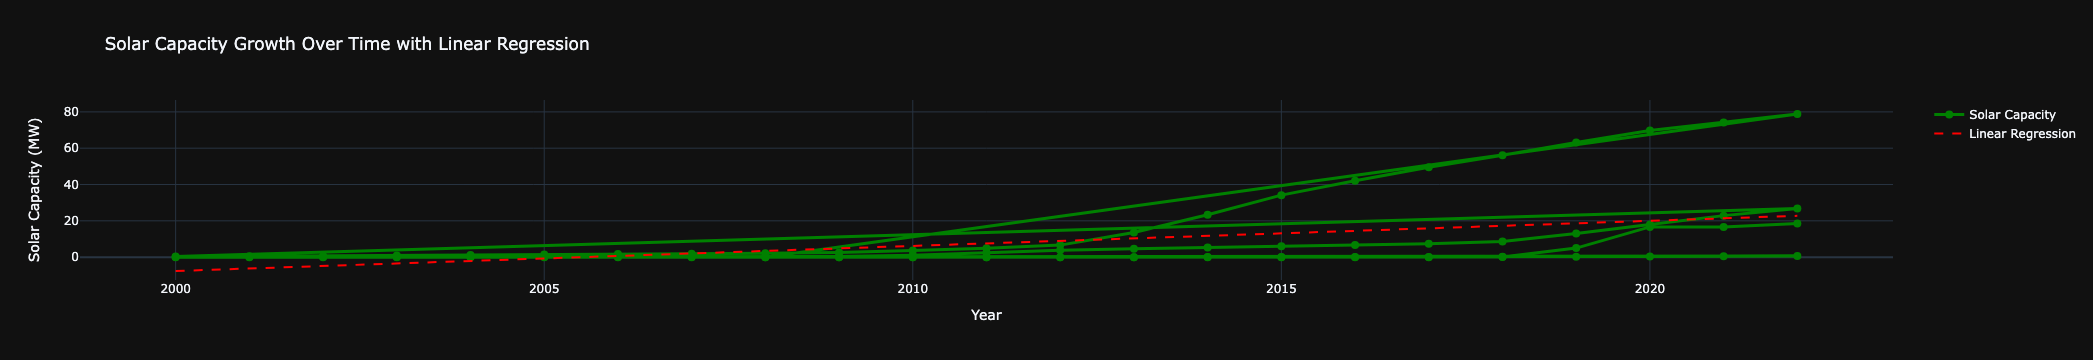

Linear Regression Equation: Y = 1.3819980507891794 * X + -2771.6199364339514


In [56]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

years = np.array(solar_capability['Year']).reshape(-1, 1)
solar_capacity = solar_capability['capability_gw']

# # Example data (Year vs. Solar Capacity in MW)
# years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
# solar_capacity = np.array([50, 100, 250, 400, 600, 800, 1200, 1500, 2000])  # Solar capacity in MW

# Fit the Linear Regression model
model = LinearRegression()
model.fit(years, solar_capacity)

# Predict values
predictions = model.predict(years)

# Create a line plot
fig = go.Figure()

# Add trace for Solar Capacity over Time
fig.add_trace(go.Scatter(
    x=years.flatten(), 
    y=solar_capacity, 
    mode='lines+markers', 
    name='Solar Capacity', 
    line=dict(color='green', width=3), 
    marker=dict(size=8)
))

# Add trace for Linear Regression Line
fig.add_trace(go.Scatter(
    x=years.flatten(), 
    y=predictions, 
    mode='lines', 
    name='Linear Regression', 
    line=dict(color='red', width=2, dash='dash')
))

# Update layout with titles and labels
fig.update_layout(
    title='Solar Capacity Growth Over Time with Linear Regression',
    xaxis_title='Year',
    yaxis_title='Solar Capacity (MW)',
    template='plotly_dark'
)

# Show plot
fig.show()

# Print the regression coefficients
slope = model.coef_[0]  # This is now correct for 1D array
intercept = model.intercept_
print(f'Linear Regression Equation: Y = {slope} * X + {intercept}')
